<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/female_births.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('/content/daily-total-female-births-CA.csv')
df

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [29]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


## Data Cleaning

In [30]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [31]:
# Find the range of dates
start_date = df['date'].min()
end_date = df['date'].max()

# Extract years
start_year = start_date.year
end_year = end_date.year

print(f"The data runs from {start_year} to {end_year}.")

The data runs from 1959 to 1959.


In [32]:
start_date = df['date'].min()
end_date = df['date'].max()
print(f"The data covers the period from {start_date} to {end_date}.")

The data covers the period from 1959-01-01 00:00:00 to 1959-12-31 00:00:00.


In [33]:
# Setting the month column as index
df.set_index('date', inplace=True)

In [34]:
df

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [36]:
# Renaming the birth column
df.rename(columns={'births': 'female_births'}, inplace=True)

## Visualization

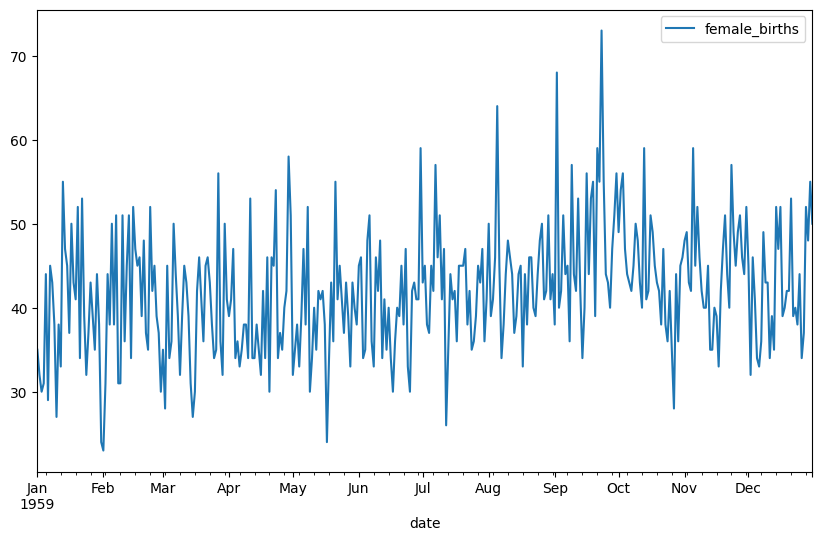

In [37]:
df.plot(figsize=(10, 6))
plt.show()

## Checking for stationarity

In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
result = adfuller(df['female_births'])
print("ADF statistics :%f" % result[0])
print("p-value: %f" % result[1])

ADF statistics :-4.808291
p-value: 0.000052


In [40]:
result

(-4.808291253559765,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [41]:
# Interpretation
adf_statistics = result[0]
p_value = result[1]

if p_value < 0.5:
    print("The time series is stationary (reject null Hypothesis)")

else:
    print("the time seris is not stationary (Fail to reject the null hypothsis)")

The time series is stationary (reject null Hypothesis)


## Decomposition

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

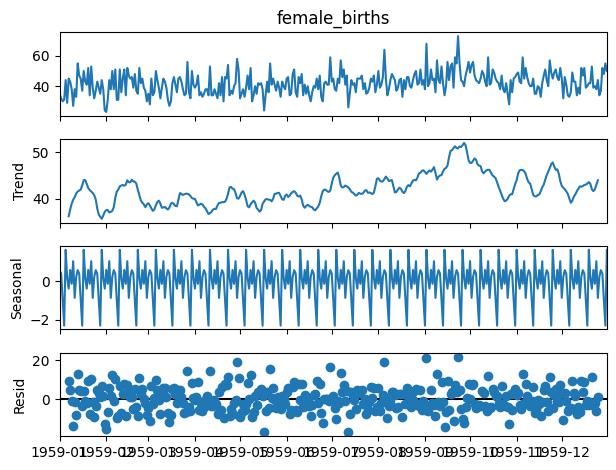

In [43]:
#decompose the time series
result = seasonal_decompose(df['female_births'], model='additive', period=12)
result.plot()
plt.show()

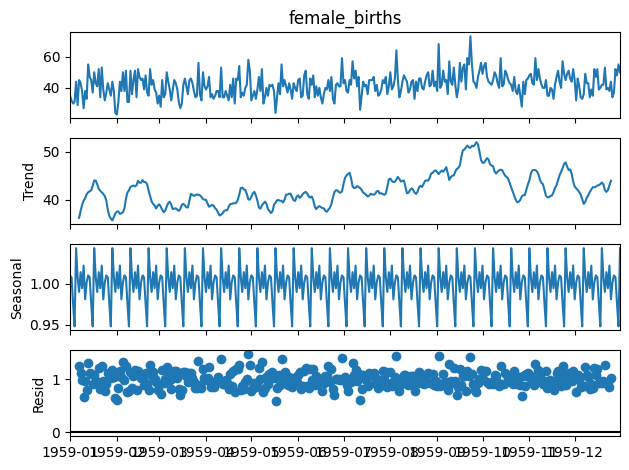

In [44]:
#decompose the time series
result = seasonal_decompose(df['female_births'], model='multiplicative', period=12)
result.plot()
plt.show()

## ACF and PACF Plot

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

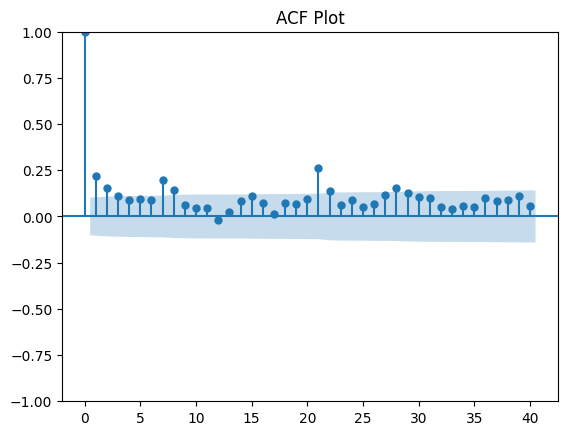

In [46]:
# Creating an acfplot
plot_acf(df['female_births'], lags=40)
plt.title("ACF Plot")
plt.show()

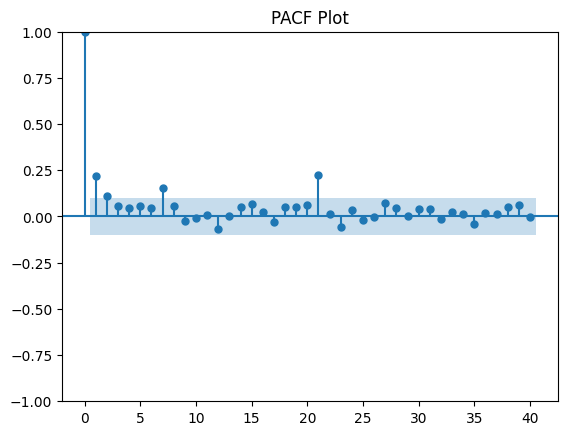

In [47]:
# Creating an pacfplot
plot_pacf(df['female_births'], lags=40)
plt.title("PACF Plot")
plt.show()

## Modelling

### Train-Test Split

In [52]:
# Calculate 80% of the data for the training set
train_size = int(len(df) * 0.8)

# Split the data into 80% training and 20% testing
train = df.iloc[:train_size]
test = df.iloc[train_size:]

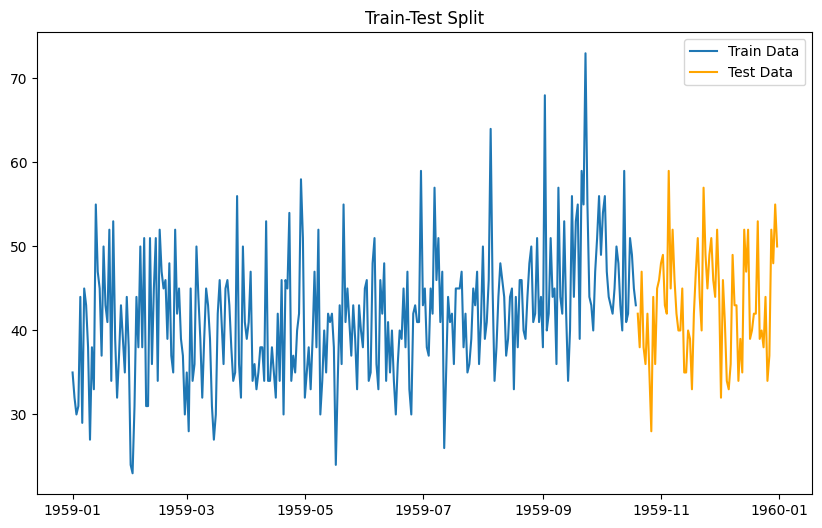

In [53]:
# Plot the train-test split
plt.figure(figsize=(10, 6))
plt.plot(train, label="Train Data")
plt.plot(test, label="Test Data", color='orange')
plt.title("Train-Test Split")
plt.legend()
plt.show()

In [54]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
model_ar = ARIMA(train, order=(2, 0, 0))
ar = model_ar.fit()
print(ar.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          female_births   No. Observations:                  292
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -995.755
Date:                Mon, 13 Jan 2025   AIC                           1999.509
Time:                        20:26:29   BIC                           2014.216
Sample:                    01-01-1959   HQIC                          2005.400
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7080      0.645     64.709      0.000      40.445      42.971
ar.L1          0.1803      0.060      2.985      0.003       0.062       0.299
ar.L2          0.1121      0.062      1.817      0.0

In [56]:
model_ma = ARIMA(train, order=(0, 0,2))
ma = model_ma.fit()
print(ma.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          female_births   No. Observations:                  292
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -996.716
Date:                Mon, 13 Jan 2025   AIC                           2001.433
Time:                        20:26:44   BIC                           2016.140
Sample:                    01-01-1959   HQIC                          2007.324
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7170      0.589     70.857      0.000      40.563      42.871
ma.L1          0.1717      0.060      2.868      0.004       0.054       0.289
ma.L2          0.1128      0.058      1.938      0.0

In [57]:
model_arma = ARIMA(train, order=(2, 0,2))
arma = model_arma.fit()
print(arma.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          female_births   No. Observations:                  292
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -986.749
Date:                Mon, 13 Jan 2025   AIC                           1985.499
Time:                        20:27:09   BIC                           2007.559
Sample:                    01-01-1959   HQIC                          1994.335
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2538      4.643      9.101      0.000      33.155      51.353
ar.L1          0.0236      0.035      0.679      0.497      -0.044       0.092
ar.L2          0.9634      0.034     28.060      0.0

In [58]:
model_arima = ARIMA(train, order=(2, 2 ,2))
arima = model_arima.fit()
print(arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:          female_births   No. Observations:                  292
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -985.116
Date:                Mon, 13 Jan 2025   AIC                           1980.232
Time:                        20:27:30   BIC                           1998.582
Sample:                    01-01-1959   HQIC                          1987.584
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0898      0.064      1.406      0.160      -0.035       0.215
ar.L2          0.0203      0.065      0.314      0.754      -0.107       0.147
ma.L1         -1.9978      0.415     -4.816      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


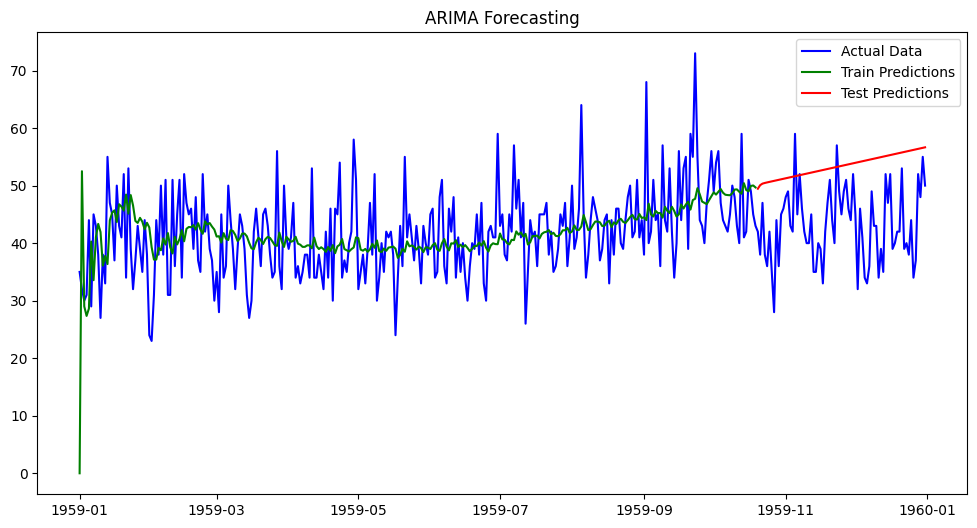

In [59]:
arima_train_predictions = arima.fittedvalues
arima_test_predictions = arima.forecast(len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df, label="Actual Data", color='blue')
plt.plot(train.index, arima_train_predictions, label="Train Predictions", color='green')
plt.plot(test.index, arima_test_predictions, label="Test Predictions", color='red')
plt.title("ARIMA Forecasting")
plt.legend()
plt.show()

In [60]:
model_sarima = SARIMAX(train, order=(2, 2 ,2), seasonal_order=(2, 2, 2, 12))
sarima = model_sarima.fit()
print(sarima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                      female_births   No. Observations:                  292
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -967.204
Date:                            Mon, 13 Jan 2025   AIC                           1952.409
Time:                                    20:28:44   BIC                           1984.660
Sample:                                01-01-1959   HQIC                          1965.365
                                     - 10-19-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0919      0.072      1.281      0.200      -0.049       0.232
ar.L2          0.0426      0.068   

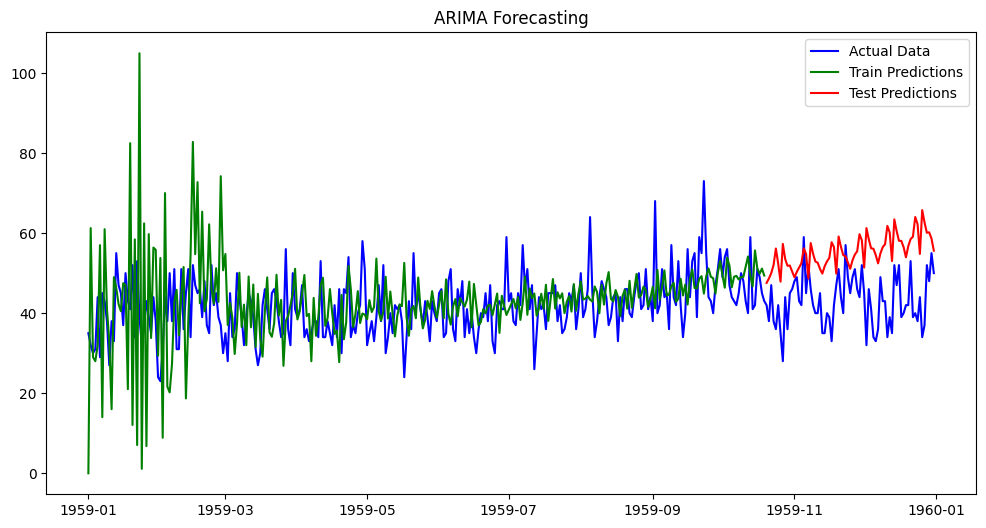

In [61]:
sarima_train_predictions = sarima.fittedvalues
sarima_test_predictions = sarima.forecast(len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df, label="Actual Data", color='blue')
plt.plot(train.index, sarima_train_predictions, label="Train Predictions", color='green')
plt.plot(test.index, sarima_test_predictions, label="Test Predictions", color='red')
plt.title("ARIMA Forecasting")
plt.legend()
plt.show()

## Evaluation

In [62]:
# Evaluate ARIMA
arima_mae = mean_absolute_error(test, arima_test_predictions)
print(f"ARIMA MAE: {arima_mae:.2f}")

# Evaluate SARIMA
sarima_mae = mean_absolute_error(test, sarima_test_predictions)
print(f"SARIMA MAE: {sarima_mae:.2f}")


ARIMA MAE: 10.69
SARIMA MAE: 12.50
